In [ ]:
%cd ../

In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
%matplotlib inline

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
haxby_db = niidb.FMriActivationsDb('data/haxby_mc_zrest.db')

In [6]:
dtfa = DTFA.DeepTFA([b for b in haxby_db.all() if 'rest' not in b.task], mask='/home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz', num_factors=100, embedding_dim=2)

05/19/2020 12:23:04 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run01_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/19/2020 12:23:05 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run02_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/19/2020 12:23:05 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run03_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/19/2020 12:23:06 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run04_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/19/2020 12:23:07 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run05_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Fina

In [7]:
dtfa.num_voxels

32233

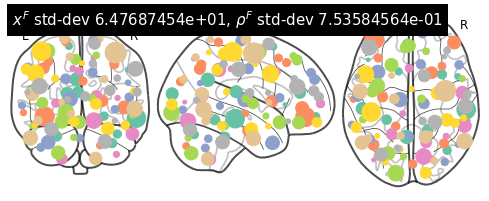

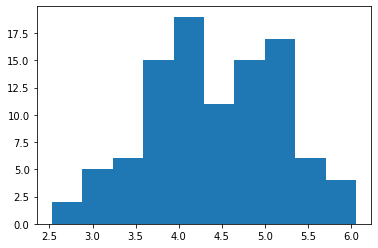

(<nilearn.plotting.displays.OrthoProjector at 0x7f5bc2a89ad0>,
 tensor([[-50.2917, -25.1389,  15.1907],
         [ 39.0786, -69.1079, -29.9516],
         [ 50.2929,   8.8432,  37.8682],
         [ 25.1188,  58.6128, -11.1063],
         [ -3.5011, -54.9390,  27.6419],
         [-43.9774,  26.1072,   1.7104],
         [-24.5826, -36.8388, -32.3481],
         [-11.9137,  13.8661,  62.7501],
         [ 59.1220, -26.1578, -13.1910],
         [ 18.4871, -47.6026, -14.3642],
         [ -2.2082,  42.0217,  14.1026],
         [-13.5990, -92.4245,  12.9470],
         [ 33.6421,  10.8539, -39.5270],
         [-28.8943, -12.7713, -26.0155],
         [ 35.8792, -61.8236,  43.6552],
         [-38.3848, -63.3072,  39.2150],
         [ 46.4885,  44.3228,  -2.0118],
         [ 22.9664,  12.5540,   5.1000],
         [ 20.8771, -77.5866, -42.0340],
         [-37.4327,  47.6987, -11.4576],
         [-59.6399, -15.4184,  -7.5021],
         [ 33.6118,  19.4785,  50.6285],
         [-15.0266, -43.7370,  67.2

In [8]:
dtfa.visualize_factor_embedding()

In [9]:
dtfa.num_blocks

552

In [10]:
losses = dtfa.train(num_steps=1000, learning_rate={'q': 1e-2, 'p': 1e-2}, log_level=logging.INFO, num_particles=1,
                    batch_size=50, use_cuda=True, checkpoint_steps=100, blocks_batch_size=10, patience=20,
                    blocks_filter=haxby_db.inference_filter(training=True))

05/19/2020 12:24:25 [Epoch 1] (7674ms) Posterior free-energy 1.09784699e+10 = KL from prior 3.76385094e+05 - log-likelihood -1.09780931e+10
05/19/2020 12:24:25 Saving checkpoint...
05/19/2020 12:24:32 [Epoch 2] (7552ms) Posterior free-energy 1.02928466e+10 = KL from prior 2.84757125e+05 - log-likelihood -1.02925609e+10
05/19/2020 12:24:40 [Epoch 3] (7465ms) Posterior free-energy 9.88529152e+09 = KL from prior 2.25695500e+05 - log-likelihood -9.88506419e+09
05/19/2020 12:24:47 [Epoch 4] (7438ms) Posterior free-energy 9.62832998e+09 = KL from prior 2.11719438e+05 - log-likelihood -9.62811904e+09
05/19/2020 12:24:55 [Epoch 5] (7480ms) Posterior free-energy 9.44477594e+09 = KL from prior 1.96392328e+05 - log-likelihood -9.44457830e+09
05/19/2020 12:25:02 [Epoch 6] (7491ms) Posterior free-energy 9.31647693e+09 = KL from prior 7.28639688e+05 - log-likelihood -9.31574886e+09
05/19/2020 12:25:10 [Epoch 7] (7467ms) Posterior free-energy 9.22412442e+09 = KL from prior 2.56195625e+05 - log-likeli

Epoch   623: reducing learning rate of group 0 to 5.0000e-03.
Epoch   623: reducing learning rate of group 1 to 5.0000e-03.
Epoch   623: reducing learning rate of group 2 to 5.0000e-03.
Epoch   623: reducing learning rate of group 3 to 5.0000e-03.


05/19/2020 13:41:52 [Epoch 625] (7400ms) Posterior free-energy 6.23388314e+09 = KL from prior 1.86413800e+06 - log-likelihood -6.23201894e+09
05/19/2020 13:41:59 [Epoch 626] (7372ms) Posterior free-energy 6.19215258e+09 = KL from prior 1.84422588e+06 - log-likelihood -6.19030682e+09
05/19/2020 13:42:07 [Epoch 627] (7376ms) Posterior free-energy 6.18972314e+09 = KL from prior 1.82582062e+06 - log-likelihood -6.18789683e+09
05/19/2020 13:42:14 [Epoch 628] (7388ms) Posterior free-energy 6.18877286e+09 = KL from prior 1.81939700e+06 - log-likelihood -6.18695322e+09
05/19/2020 13:42:21 [Epoch 629] (7403ms) Posterior free-energy 6.18846669e+09 = KL from prior 1.83610800e+06 - log-likelihood -6.18663066e+09
05/19/2020 13:42:29 [Epoch 630] (7399ms) Posterior free-energy 6.18777600e+09 = KL from prior 1.83372125e+06 - log-likelihood -6.18594253e+09
05/19/2020 13:42:36 [Epoch 631] (7390ms) Posterior free-energy 6.18766694e+09 = KL from prior 1.82773225e+06 - log-likelihood -6.18583910e+09
05/19/

Epoch   812: reducing learning rate of group 0 to 2.5000e-03.
Epoch   812: reducing learning rate of group 1 to 2.5000e-03.
Epoch   812: reducing learning rate of group 2 to 2.5000e-03.
Epoch   812: reducing learning rate of group 3 to 2.5000e-03.


05/19/2020 14:05:21 [Epoch 814] (7585ms) Posterior free-energy 6.16734054e+09 = KL from prior 1.87041038e+06 - log-likelihood -6.16547123e+09
05/19/2020 14:05:28 [Epoch 815] (7624ms) Posterior free-energy 6.16489830e+09 = KL from prior 1.85813750e+06 - log-likelihood -6.16303974e+09
05/19/2020 14:05:36 [Epoch 816] (7597ms) Posterior free-energy 6.16451994e+09 = KL from prior 1.85774575e+06 - log-likelihood -6.16266189e+09
05/19/2020 14:05:43 [Epoch 817] (7612ms) Posterior free-energy 6.16430285e+09 = KL from prior 1.86882575e+06 - log-likelihood -6.16243507e+09
05/19/2020 14:05:51 [Epoch 818] (7582ms) Posterior free-energy 6.16437453e+09 = KL from prior 1.87158050e+06 - log-likelihood -6.16250419e+09
05/19/2020 14:05:59 [Epoch 819] (7596ms) Posterior free-energy 6.16409190e+09 = KL from prior 1.87358138e+06 - log-likelihood -6.16221850e+09
05/19/2020 14:06:06 [Epoch 820] (7585ms) Posterior free-energy 6.16400128e+09 = KL from prior 1.88496238e+06 - log-likelihood -6.16211558e+09
05/19/

Epoch   883: reducing learning rate of group 0 to 1.2500e-03.
Epoch   883: reducing learning rate of group 1 to 1.2500e-03.
Epoch   883: reducing learning rate of group 2 to 1.2500e-03.
Epoch   883: reducing learning rate of group 3 to 1.2500e-03.


05/19/2020 14:14:15 [Epoch 885] (7501ms) Posterior free-energy 6.16131891e+09 = KL from prior 1.87668038e+06 - log-likelihood -6.15944294e+09
05/19/2020 14:14:23 [Epoch 886] (7446ms) Posterior free-energy 6.16124314e+09 = KL from prior 1.85041675e+06 - log-likelihood -6.15939328e+09
05/19/2020 14:14:30 [Epoch 887] (7464ms) Posterior free-energy 6.16103424e+09 = KL from prior 1.85031712e+06 - log-likelihood -6.15918490e+09
05/19/2020 14:14:37 [Epoch 888] (7466ms) Posterior free-energy 6.16087194e+09 = KL from prior 1.84740438e+06 - log-likelihood -6.15902464e+09
05/19/2020 14:14:45 [Epoch 889] (7467ms) Posterior free-energy 6.16102707e+09 = KL from prior 1.84698950e+06 - log-likelihood -6.15918029e+09
05/19/2020 14:14:52 [Epoch 890] (7439ms) Posterior free-energy 6.16071731e+09 = KL from prior 1.85023625e+06 - log-likelihood -6.15886541e+09
05/19/2020 14:15:00 [Epoch 891] (7447ms) Posterior free-energy 6.16071219e+09 = KL from prior 1.85757050e+06 - log-likelihood -6.15885568e+09
05/19/

Epoch   914: reducing learning rate of group 0 to 6.2500e-04.
Epoch   914: reducing learning rate of group 1 to 6.2500e-04.
Epoch   914: reducing learning rate of group 2 to 6.2500e-04.
Epoch   914: reducing learning rate of group 3 to 6.2500e-04.


05/19/2020 14:18:08 [Epoch 916] (7455ms) Posterior free-energy 6.16013568e+09 = KL from prior 1.84636475e+06 - log-likelihood -6.15828838e+09
05/19/2020 14:18:15 [Epoch 917] (7460ms) Posterior free-energy 6.16014131e+09 = KL from prior 1.84010912e+06 - log-likelihood -6.15830118e+09
05/19/2020 14:18:23 [Epoch 918] (7471ms) Posterior free-energy 6.16003277e+09 = KL from prior 1.83862575e+06 - log-likelihood -6.15819674e+09
05/19/2020 14:18:30 [Epoch 919] (7443ms) Posterior free-energy 6.15997952e+09 = KL from prior 1.84004288e+06 - log-likelihood -6.15813939e+09
05/19/2020 14:18:37 [Epoch 920] (7453ms) Posterior free-energy 6.15994419e+09 = KL from prior 1.83980775e+06 - log-likelihood -6.15810458e+09
05/19/2020 14:18:45 [Epoch 921] (7435ms) Posterior free-energy 6.15978803e+09 = KL from prior 1.84286762e+06 - log-likelihood -6.15794534e+09
05/19/2020 14:18:52 [Epoch 922] (7435ms) Posterior free-energy 6.15995955e+09 = KL from prior 1.84814712e+06 - log-likelihood -6.15811174e+09
05/19/

Epoch   941: reducing learning rate of group 0 to 3.1250e-04.
Epoch   941: reducing learning rate of group 1 to 3.1250e-04.
Epoch   941: reducing learning rate of group 2 to 3.1250e-04.
Epoch   941: reducing learning rate of group 3 to 3.1250e-04.


05/19/2020 14:21:29 [Epoch 943] (7445ms) Posterior free-energy 6.15966106e+09 = KL from prior 1.85549275e+06 - log-likelihood -6.15780710e+09
05/19/2020 14:21:36 [Epoch 944] (7453ms) Posterior free-energy 6.15965491e+09 = KL from prior 1.83615838e+06 - log-likelihood -6.15781990e+09
05/19/2020 14:21:44 [Epoch 945] (7437ms) Posterior free-energy 6.15941427e+09 = KL from prior 1.83355050e+06 - log-likelihood -6.15757978e+09
05/19/2020 14:21:51 [Epoch 946] (7443ms) Posterior free-energy 6.15956582e+09 = KL from prior 1.83184062e+06 - log-likelihood -6.15773286e+09
05/19/2020 14:21:59 [Epoch 947] (7460ms) Posterior free-energy 6.15967334e+09 = KL from prior 1.83185812e+06 - log-likelihood -6.15784038e+09
05/19/2020 14:22:06 [Epoch 948] (7473ms) Posterior free-energy 6.15940403e+09 = KL from prior 1.83326612e+06 - log-likelihood -6.15757056e+09
05/19/2020 14:22:14 [Epoch 949] (7517ms) Posterior free-energy 6.15957248e+09 = KL from prior 1.83093388e+06 - log-likelihood -6.15774157e+09
05/19/

Epoch   962: reducing learning rate of group 0 to 1.5625e-04.
Epoch   962: reducing learning rate of group 1 to 1.5625e-04.
Epoch   962: reducing learning rate of group 2 to 1.5625e-04.
Epoch   962: reducing learning rate of group 3 to 1.5625e-04.


05/19/2020 14:24:08 [Epoch 964] (7600ms) Posterior free-energy 6.15948646e+09 = KL from prior 1.82676775e+06 - log-likelihood -6.15766118e+09
05/19/2020 14:24:15 [Epoch 965] (7602ms) Posterior free-energy 6.15932314e+09 = KL from prior 1.82717938e+06 - log-likelihood -6.15749632e+09
05/19/2020 14:24:23 [Epoch 966] (7620ms) Posterior free-energy 6.15938867e+09 = KL from prior 1.82553712e+06 - log-likelihood -6.15756442e+09
05/19/2020 14:24:31 [Epoch 967] (7582ms) Posterior free-energy 6.15933440e+09 = KL from prior 1.82552000e+06 - log-likelihood -6.15750912e+09
05/19/2020 14:24:38 [Epoch 968] (7579ms) Posterior free-energy 6.15931955e+09 = KL from prior 1.82528275e+06 - log-likelihood -6.15749376e+09
05/19/2020 14:24:46 [Epoch 969] (7575ms) Posterior free-energy 6.15947674e+09 = KL from prior 1.82443400e+06 - log-likelihood -6.15765453e+09
05/19/2020 14:24:53 [Epoch 970] (7574ms) Posterior free-energy 6.15943168e+09 = KL from prior 1.82600462e+06 - log-likelihood -6.15760742e+09
05/19/

Epoch   983: reducing learning rate of group 0 to 7.8125e-05.
Epoch   983: reducing learning rate of group 1 to 7.8125e-05.
Epoch   983: reducing learning rate of group 2 to 7.8125e-05.
Epoch   983: reducing learning rate of group 3 to 7.8125e-05.


05/19/2020 14:26:47 [Epoch 985] (7464ms) Posterior free-energy 6.15928115e+09 = KL from prior 1.82349238e+06 - log-likelihood -6.15745690e+09
05/19/2020 14:26:54 [Epoch 986] (7434ms) Posterior free-energy 6.15936307e+09 = KL from prior 1.82363012e+06 - log-likelihood -6.15753984e+09
05/19/2020 14:27:02 [Epoch 987] (7453ms) Posterior free-energy 6.15930010e+09 = KL from prior 1.82241588e+06 - log-likelihood -6.15747789e+09
05/19/2020 14:27:09 [Epoch 988] (7452ms) Posterior free-energy 6.15920077e+09 = KL from prior 1.82191075e+06 - log-likelihood -6.15737958e+09
05/19/2020 14:27:17 [Epoch 989] (7459ms) Posterior free-energy 6.15938406e+09 = KL from prior 1.82269238e+06 - log-likelihood -6.15756134e+09
05/19/2020 14:27:24 [Epoch 990] (7460ms) Posterior free-energy 6.15917466e+09 = KL from prior 1.82347575e+06 - log-likelihood -6.15735091e+09
05/19/2020 14:27:32 [Epoch 991] (7442ms) Posterior free-energy 6.15928218e+09 = KL from prior 1.82343888e+06 - log-likelihood -6.15745946e+09
05/19/

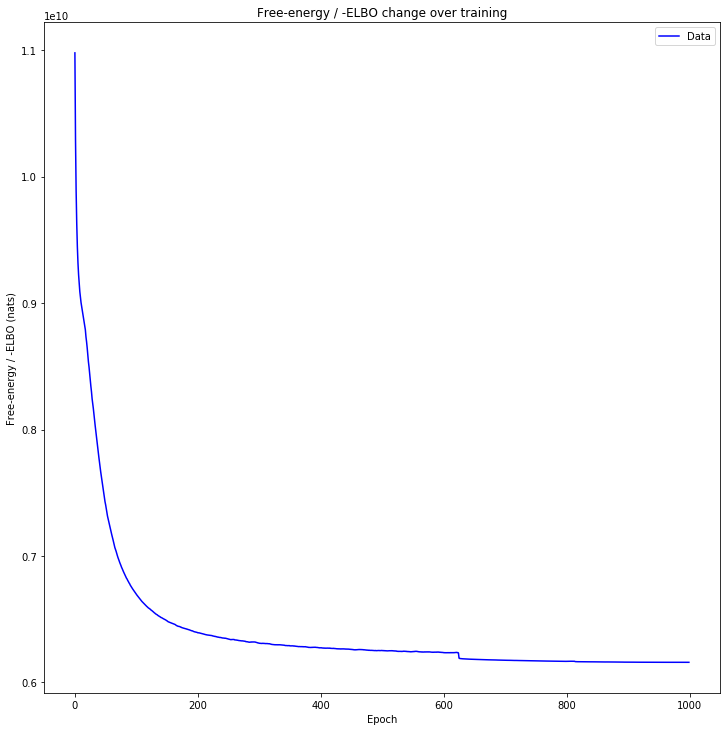

In [11]:
utils.plot_losses(losses)

In [12]:
def task_labeler(task):
    return task

def rest_task_labeler(task):
    if task == 'rest':
        return 'Rest'
    else:
        return 'Task'

/home/eli/AnacondaProjects/HTFATorch/htfa_torch/utils.py:149: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


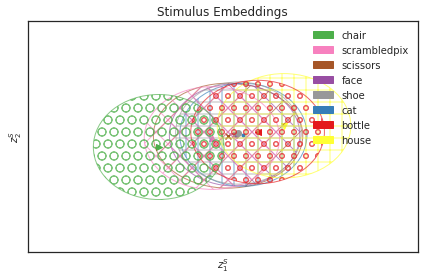

In [13]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=None, colormap='Set1',
                            filename='haxby_norest_task_embedding.pdf')

In [14]:
def subject_labeler(subject):
    return 'Subject %d' % subject

/home/eli/AnacondaProjects/HTFATorch/htfa_torch/utils.py:149: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


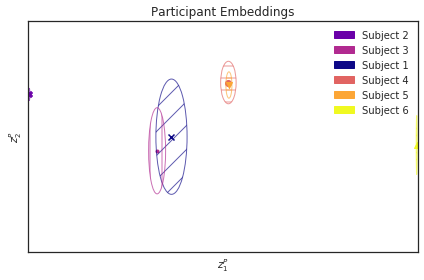

In [15]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None, colormap='plasma')

In [16]:
def block_task_labeler(b):
    task = b.task
    return task

05/19/2020 14:28:40 Plotting factors for Participant 3, run 3


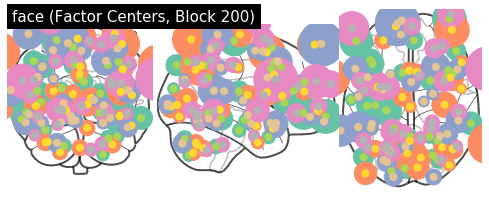

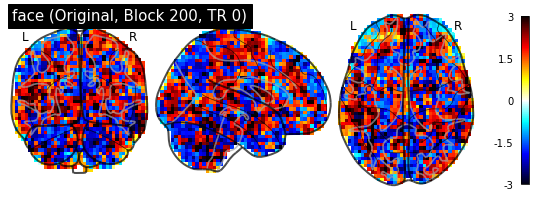

/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/nilearn/plotting/displays.py:767: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))
05/19/2020 14:28:42 Reconstruction Error (Frobenius Norm): 9.35858612e+01 out of 5.52729492e+02


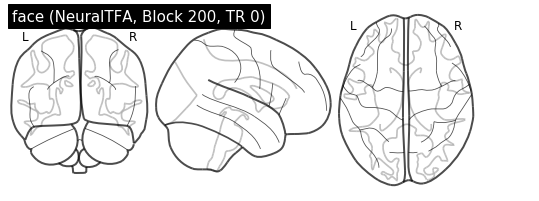

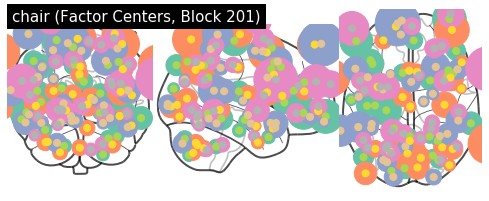

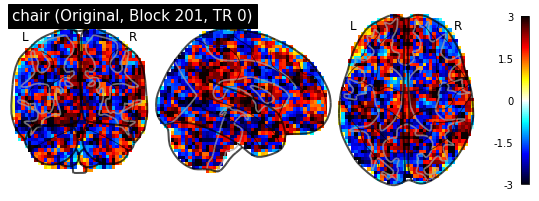

05/19/2020 14:28:45 Reconstruction Error (Frobenius Norm): 1.28536224e+02 out of 5.97188660e+02


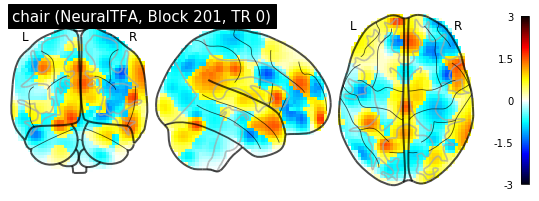

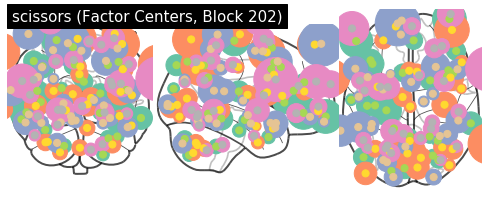

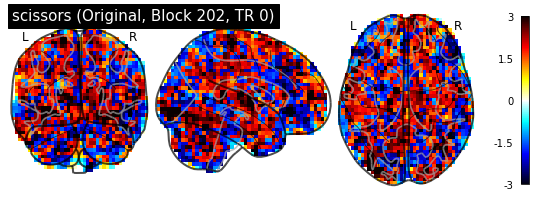

05/19/2020 14:28:48 Reconstruction Error (Frobenius Norm): 1.03754158e+02 out of 5.42983215e+02


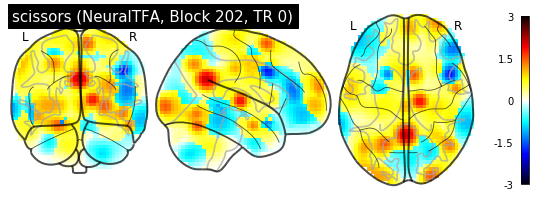

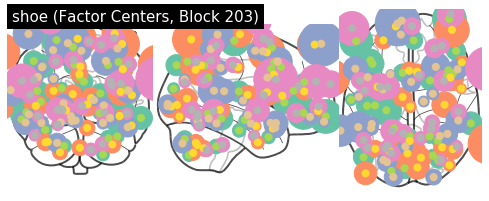

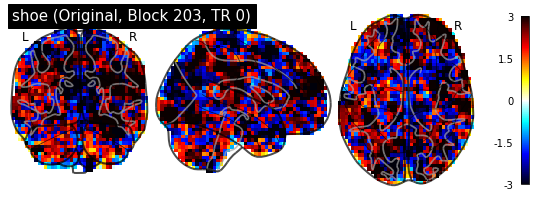

05/19/2020 14:28:51 Reconstruction Error (Frobenius Norm): 1.23354797e+02 out of 6.29730103e+02


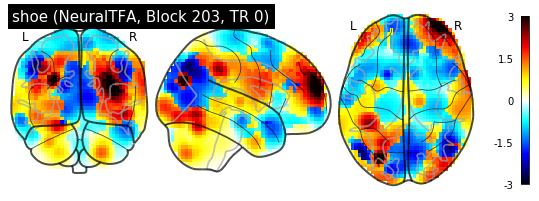

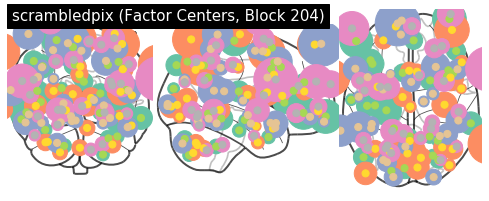

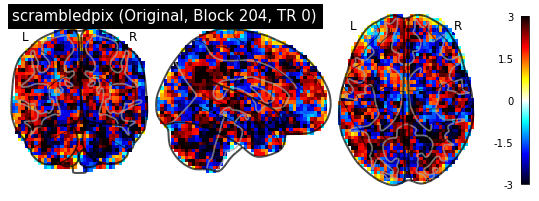

05/19/2020 14:28:54 Reconstruction Error (Frobenius Norm): 1.27055611e+02 out of 5.83237183e+02


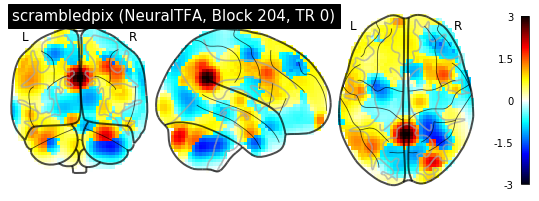

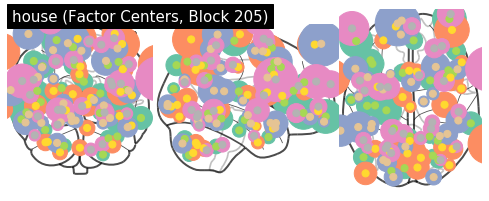

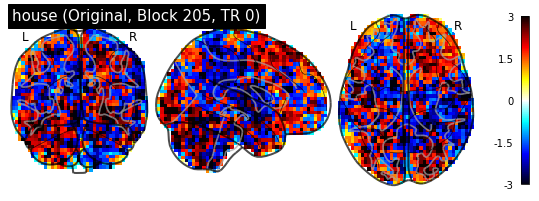

05/19/2020 14:28:57 Reconstruction Error (Frobenius Norm): 1.41305771e+02 out of 6.56624023e+02


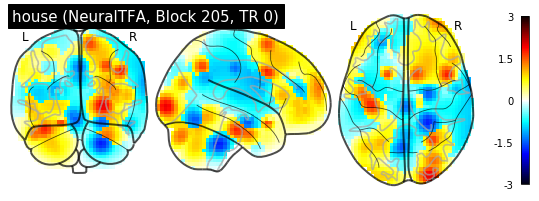

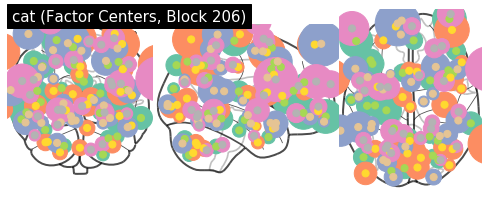

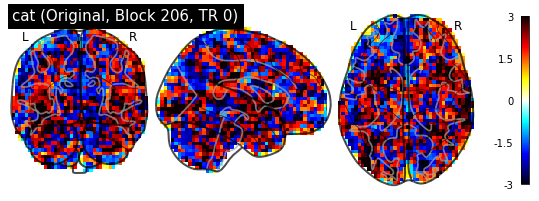

05/19/2020 14:29:00 Reconstruction Error (Frobenius Norm): 1.18691315e+02 out of 6.03989807e+02


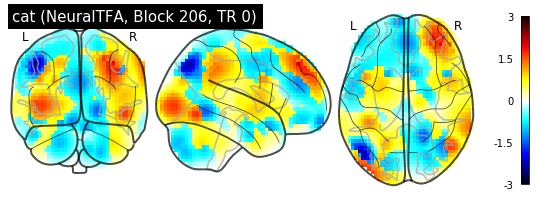

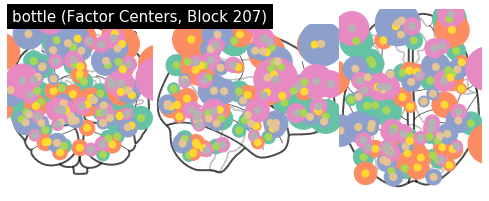

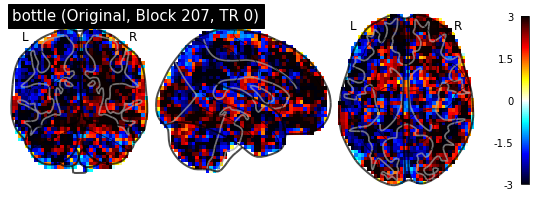

05/19/2020 14:29:03 Reconstruction Error (Frobenius Norm): 1.37778641e+02 out of 6.51426147e+02


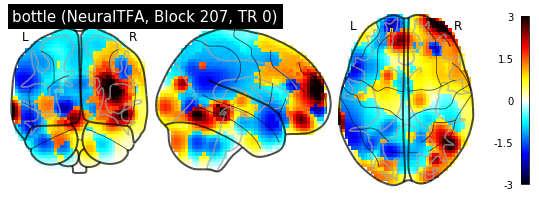

In [17]:
subject_runs = set([(block.subject, block.run) for block in dtfa._blocks])

for i in np.random.choice(range(len(subject_runs)), 1):
    subject, run = list(subject_runs)[i]
    logging.info('Plotting factors for Participant %d, run %d' % (subject, run))
    blocks = [block for block in dtfa._blocks if block.subject == subject and block.run == run]
    blocks.sort(key=lambda b: b.start_time)
    for block in blocks:
        index = dtfa._blocks.index(block)
        dtfa.plot_factor_centers(index, labeler=block_task_labeler)
        dtfa.plot_original_brain(index, labeler=block_task_labeler)
        dtfa.plot_reconstruction(index, labeler=block_task_labeler)

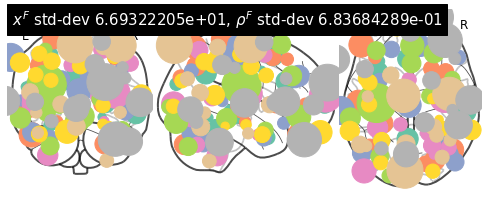

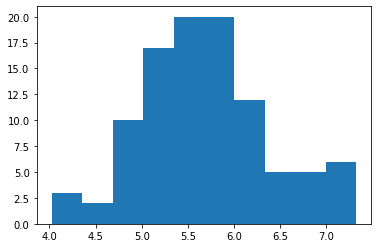

(<nilearn.plotting.displays.OrthoProjector at 0x7f5b7353c810>,
 tensor([[-5.6707e+01, -2.8947e+01,  1.9552e+01],
         [ 3.8743e+01, -5.7991e+01, -2.4226e+01],
         [ 4.4024e+01,  2.0829e+00,  3.8050e+01],
         [ 2.6877e+01,  6.8049e+01,  2.4189e+00],
         [-2.5195e+00, -5.7048e+01,  3.4384e+01],
         [-3.2356e+01,  2.4677e+01,  4.6510e+00],
         [-3.1724e+01, -4.6893e+01, -2.0533e+01],
         [-3.3821e+01,  1.3629e+01,  5.2835e+01],
         [ 5.8729e+01, -2.8512e+01, -8.4907e+00],
         [ 2.3080e+01, -5.3727e+01, -1.2134e+01],
         [-2.6523e+00,  2.7207e+01,  2.6122e+01],
         [-1.5349e+01, -8.8139e+01,  2.3120e+01],
         [ 3.3369e+01,  7.9182e+00, -3.2704e+01],
         [-2.4293e+01, -1.5610e+01, -1.6757e+01],
         [ 4.4552e+01, -6.8685e+01,  6.2184e+01],
         [-4.2577e+01, -6.7101e+01,  4.2083e+01],
         [ 4.2612e+01,  4.7972e+01,  1.2048e+00],
         [ 2.2644e+01,  1.6641e+01,  1.2049e+00],
         [ 2.6108e+01, -7.9548e+01, -

In [18]:
dtfa.visualize_factor_embedding()

In [19]:
dtfa.average_reconstruction_error(weighted=False,
                                  blocks_filter=haxby_db.inference_filter(training=True))

05/19/2020 14:29:17 Average reconstruction error (MSE): 5.05086241e+02 +/- 3.90281209e+01
05/19/2020 14:29:17 Average data norm (Euclidean): 6.03396825e+02 +/- 6.17218783e+01
05/19/2020 14:29:17 Percent average reconstruction error: 83.962530 +/- 3.38565646e+00


(array([561.21258545, 533.85394287, 500.82632446, 509.05184937,
        526.92749023, 509.61584473, 514.06243896, 485.6867981 ,
        558.02685547, 527.91876221, 498.42721558, 449.85772705,
        470.95574951, 486.77618408, 549.90814209, 540.46875   ,
        499.46847534, 496.13284302, 468.74591064, 502.18154907,
        477.89144897, 530.87835693, 499.76043701, 509.75473022,
        613.93365479, 548.92584229, 510.25320435, 533.50091553,
        476.9838562 , 512.36047363, 515.85430908, 474.37954712,
        586.22564697, 525.24645996, 467.43353271, 491.74285889,
        529.85534668, 490.13015747, 506.21121216, 539.01098633,
        596.82171631, 498.62521362, 497.60180664, 520.71551514,
        526.55596924, 507.24581909, 542.1418457 , 490.28610229,
        522.46594238, 532.58813477, 482.94824219, 455.73522949,
        506.33233643, 555.08099365, 518.67468262, 548.6463623 ,
        452.10134888, 449.7064209 , 466.79055786, 447.21615601,
        462.24035645, 466.53244019, 431.